In [1]:
from matplotlib import pyplot as plt
import sympy as sy
from sympy import lambdify
import numpy as np

# Problem 1:

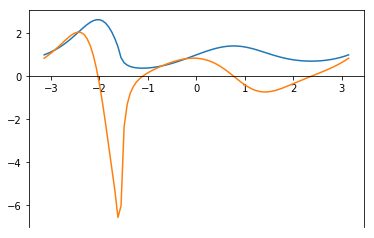

In [2]:
def problem_one():
    x = sy.symbols('x')
    g = (sy.sin(x)+1) ** (sy.sin(sy.cos(x)))
    f = sy.diff(g)
    t = lambdify(x, f, 'numpy')
    
    return t
space = np.linspace(-np.pi, np.pi, 100)
t = problem_one()
ax = plt.plot(space, (np.sin(space)+1) ** (np.sin(np.cos(space))))
plt.plot(space, t(space))
ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")
plt.show()

# Problem 2:

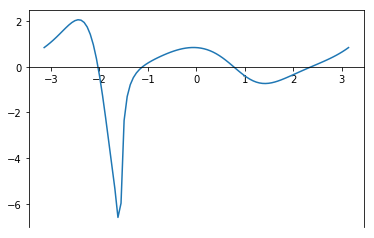

In [3]:
x = np.linspace(-np.pi, np.pi, 100)
f = lambda t : (np.sin(t)+1) ** (np.sin(np.cos(t)))
def forward_o1(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (f(arr[i] + h) - f(arr[i]))/h
    return diffs
ax = plt.plot(x, forward_o1(f,x, .001))
ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

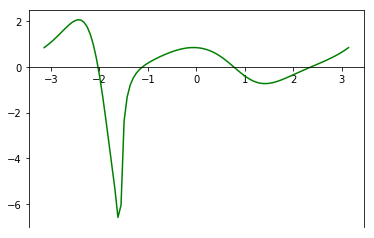

In [4]:
def forward_o2(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (-3*f(arr[i]) + 4*f(arr[i]+h) -f(arr[i]+2*h))/(2*h)
    return diffs
ax = plt.plot(x, forward_o2(f,x, .001), 'g')

ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

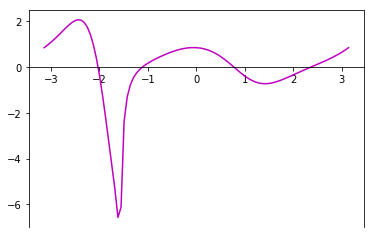

In [5]:
def backward_o1(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (f(arr[i]) - f(arr[i] - h))/h
    return diffs
ax = plt.plot(x, backward_o1(f,x, .001), 'm')

ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

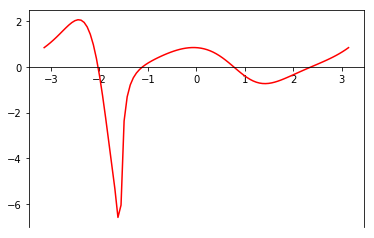

In [6]:
def backward_o2(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (3*f(arr[i]) - 4*f(arr[i] - h) +f(arr[i]-2*h))/(2*h)
    return diffs
ax = plt.plot(x, backward_o2(f,x, .001), 'r')

ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

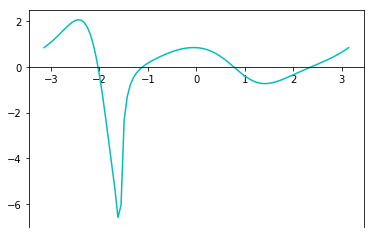

In [7]:
def center_o2(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (f(arr[i]+ h) - f(arr[i] - h))/(2*h)
    return diffs
ax = plt.plot(x, center_o2(f,x, .001), 'c')

ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

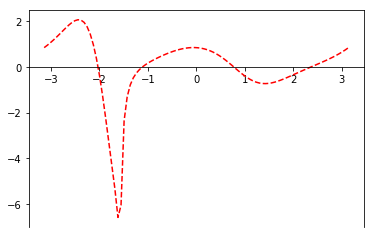

In [8]:
def center_o4(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (f(arr[i]-2*h) - 8*f(arr[i]-h) + 8*f(arr[i]+h) - f(arr[i]+2*h))/(12*h)
    return diffs
ax = plt.plot(x, center_o4(f,x, .001), 'r--')

ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

# Problem 3: 

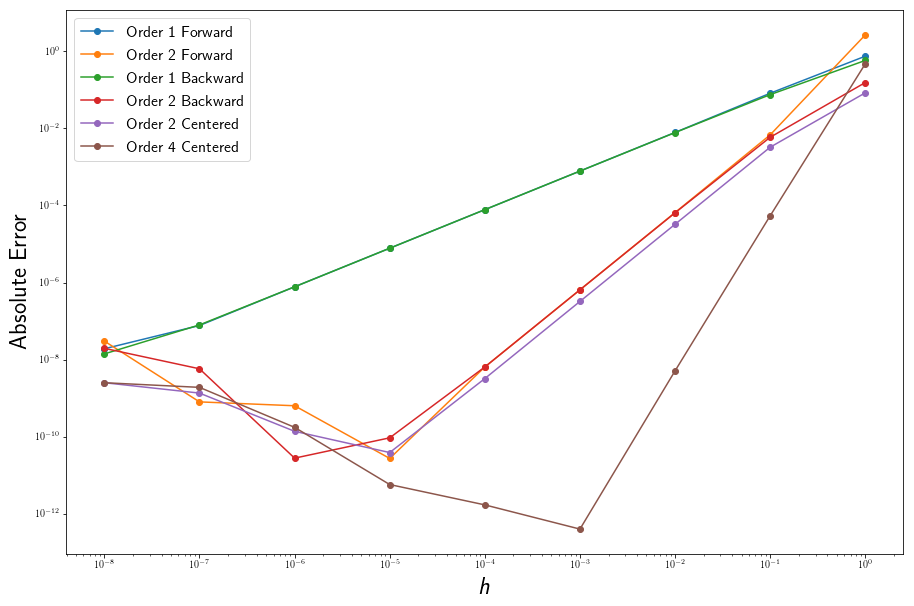

In [10]:
def problem_three(x_0):
    f = lambda x : (np.sin(x)+1) ** (np.sin(np.cos(x)))
    g = problem_one()
    exact = g(x_0)
    #h_array = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    h_array = np.logspace(-8, 0 , 9)
    o_1_f_err = np.zeros(9)
    o_2_f_err = np.zeros(9)
    o_1_b_err = np.zeros(9)
    o_2_b_err = np.zeros(9)
    o_2_c_err = np.zeros(9)
    o_4_c_err = np.zeros(9)
    count = 0
    for h in h_array:
        o_1_f_err[count] = np.abs(forward_o1(f, [x_0], h) - exact)
        o_2_f_err[count]= np.abs(forward_o2(f, [x_0], h) - exact)
        o_1_b_err[count]= np.abs(backward_o1(f, [x_0], h) - exact)
        o_2_b_err[count]= np.abs(backward_o2(f, [x_0], h) - exact)
        o_2_c_err[count]= np.abs(center_o2(f, [x_0], h) - exact)
        o_4_c_err[count]= np.abs(center_o4(f, [x_0], h) - exact)
        count += 1
    #sp = np.logspace(-8, 0, 9)
    plt.figure(figsize = [15, 10])
    plt.rc('text', usetex=True)
    plt.loglog(h_array, o_1_f_err, label="Order 1 Forward", marker='o')
    plt.loglog(h_array, o_2_f_err, label="Order 2 Forward", marker='o')
    plt.loglog(h_array, o_1_b_err, label="Order 1 Backward",marker='o')
    plt.loglog(h_array, o_2_b_err, label="Order 2 Backward",marker='o')
    plt.loglog(h_array, o_2_c_err, label="Order 2 Centered",marker='o')
    plt.loglog(h_array, o_4_c_err,label="Order 4 Centered",marker='o' )
    plt.xlabel(r'\textit{h}', fontsize = 24)
    plt.ylabel("Absolute Error", fontsize=24)
    plt.legend(loc="upper left", prop={'size': 16})
    
problem_three(np.pi)

# Problem 5: 

In [98]:
def jacobian_centered_o2(f, x_0, h):
    jacobian = np.zeros((len((f(x_0))), len(x_0)))
    for i in range(len(f(x_0))):
            jacobian[:,i] = (f(x_0 + h * np.eye(len(x_0))[i]) - f(x_0 - h * np.eye(len(x_0))[i]))/(2*h)
    return jacobian

In [99]:
f = lambda x: np.array([x[0] ** 2, x[0] ** 3 - x[1]])

jac = jacobian_centered_o2(f, [7,2], .001)

print(jac)

[[ 14.         0.      ]
 [147.000001  -1.      ]]


# Problem 6:

In [109]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


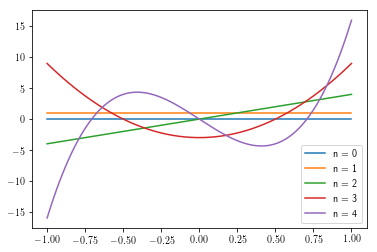

In [144]:
def chebyshev(x, n):
    if n==0:
        return anp.ones_like(len(x))
    if n==1:
        return x
    return 2 * x * chebyshev(x, n-1) - chebyshev(x, n-2)

dcheby = elementwise_grad(chebyshev)
sp = np.linspace(-1,1, 200)
for n in range(5):
    plt.plot(sp, dcheby(sp, n), label="n = {}".format(n))
plt.legend()
plt.show()